<a href="https://colab.research.google.com/github/suraj4502/Python_code/blob/main/Decision_Tree_C5_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
# import some data to play with
iris = pd.read_csv('Iris.csv')

In [3]:
iris.head()

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
iris['Species']= label_encoder.fit_transform(iris['iris']) 

In [5]:
iris

,sepal length,sepal width,petal length,petal width,iris,Species
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [6]:
x=iris.iloc[:,0:4]
y=iris['Species']

In [ ]:
x

In [ ]:
y

In [9]:
iris['Species'].unique()

array([0, 1, 2])

In [10]:
iris.Species.value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [11]:
colnames = list(iris.columns)
colnames

['sepal length',
 'sepal width',
 'petal length',
 'petal width',
 'iris',
 'Species']

In [12]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=45)

### Building Decision Tree Classifier using Entropy Criteria

In [13]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

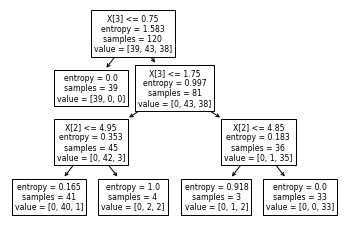

In [16]:
#PLot the decision tree
tree.plot_tree(model);

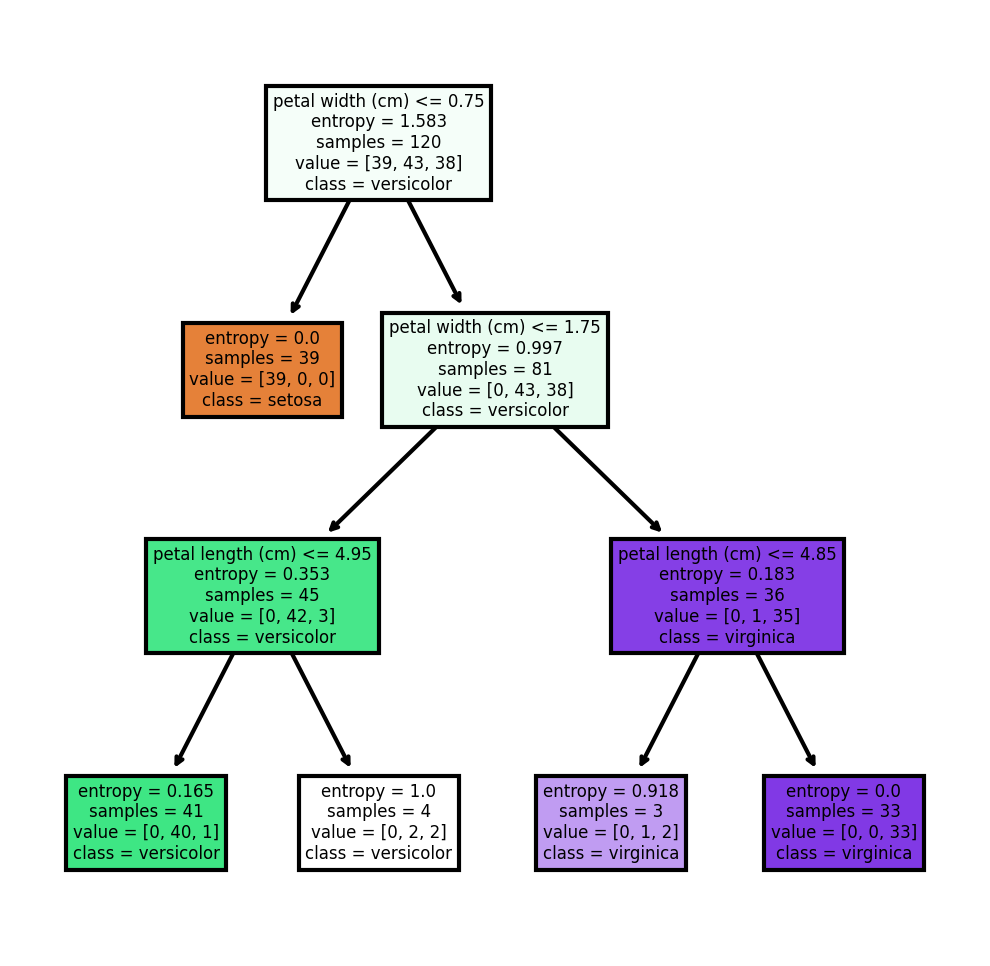

In [17]:
features=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
classes=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = features, 
               class_names=classes,
               filled = True);

In [29]:
#predicting on training data
pred_T=model.predict(x_train)
pd.Series(pred_T).value_counts()

1    45
0    39
2    36
dtype: int64

In [32]:
pred_T

array([1, 1, 1, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 2, 1, 2, 0, 0, 1,
       2, 0, 2, 0, 0, 1, 0, 1, 1, 2, 1, 2, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1,
       1, 0, 0, 1, 0, 1, 2, 2, 2, 1, 1, 2, 1, 0, 1, 1, 1, 2, 1, 2, 2, 1,
       1, 2, 2, 2, 0, 0, 1, 2, 2, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 2,
       0, 2, 1, 1, 2, 2, 1, 0, 0, 1, 0, 1, 2, 2, 0, 0, 0, 2, 0, 0, 2, 1,
       1, 1, 0, 2, 2, 1, 1, 0, 2, 2])

In [33]:
pd.crosstab(y_train,pred_T)

col_0,0,1,2
Species,,,
0,39,0,0
1,0,42,1
2,0,3,35


In [35]:
#accuracy on training data
np.mean(y_train==pred_T)

0.9666666666666667

In [18]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    11
2    10
1     9
dtype: int64

In [19]:
preds

array([0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 1, 1, 1,
       2, 1, 0, 2, 1, 1, 0, 1])

In [20]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2
Species,,,
0,11,0,0
1,0,7,0
2,0,2,10


In [21]:
# Accuracy 
np.mean(preds==y_test)

0.9333333333333333